In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Создание массива дат

In [5]:
pd.date_range(start = "2024-01-01", end = datetime.now())

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14',
               '2024-11-15', '2024-11-16', '2024-11-17', '2024-11-18',
               '2024-11-19', '2024-11-20'],
              dtype='datetime64[ns]', length=325, freq='D')

In [7]:
pd.date_range(start = "2024-01-01", end = datetime.now(), freq = 'ME')

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31'],
              dtype='datetime64[ns]', freq='ME')

### Resample

In [14]:
usdrub = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_usdrub.csv', sep = ';', index_col = 0)
usdrub.index = pd.to_datetime(usdrub.index, format = '%d.%m.%Y')
usdrub = usdrub.sort_index(ascending = True)
usdrub = usdrub.loc['1998':]
usdrub['curs'] = usdrub['curs'].astype(float)
usdrub.head()

,curs
data,
1998-01-01,5.960
1998-01-06,5.963
1998-01-07,5.969
1998-01-09,5.972
1998-01-10,5.974


In [15]:
usdrub['curs'].resample('ME').mean()

data
1998-01-31     5.996650
1998-02-28     6.050850
1998-03-31     6.089925
1998-04-30     6.123773
1998-05-31     6.149447
                ...    
2024-07-31    87.491650
2024-08-31    89.160161
2024-09-30    91.234505
2024-10-31    96.160226
2024-11-30    98.390579
Freq: ME, Name: curs, Length: 323, dtype: float64

In [16]:
usdrub['curs'].resample('QE').mean()

data
1998-03-31     6.045808
1998-06-30     6.150238
1998-09-30     9.117445
1998-12-31    17.480670
1999-03-31    22.918667
                ...    
2023-12-31    92.753353
2024-03-31    90.800246
2024-06-30    90.480057
2024-09-30    89.233694
2024-12-31    97.004143
Freq: QE-DEC, Name: curs, Length: 108, dtype: float64

In [17]:
usdrub['curs'].resample('YE').mean()

data
1998-12-31     9.794531
1999-12-31    24.648920
2000-12-31    28.128725
2001-12-31    29.175301
2002-12-31    31.360773
2003-12-31    30.671864
2004-12-31    28.808037
2005-12-31    28.313618
2006-12-31    27.135468
2007-12-31    25.551564
2008-12-31    24.873955
2009-12-31    31.766885
2010-12-31    30.376541
2011-12-31    29.394828
2012-12-31    31.074172
2013-12-31    31.906305
2014-12-31    38.602468
2015-12-31    61.319435
2016-12-31    66.833472
2017-12-31    58.298185
2018-12-31    62.926389
2019-12-31    64.618432
2020-12-31    72.323002
2021-12-31    73.668540
2022-12-31    68.352166
2023-12-31    85.811571
2024-12-31    91.295711
Freq: YE-DEC, Name: curs, dtype: float64

### Построение графика временного ряда

In [11]:
gdppc = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_gdp.csv', index_col = 0)
gdppc.index = pd.to_datetime(gdppc.index)
gdppc.head()

,RGDPRU
Date,
2011-01-01,26470
2011-04-01,28625
2011-07-01,30177
2011-10-01,32312
2012-01-01,27980


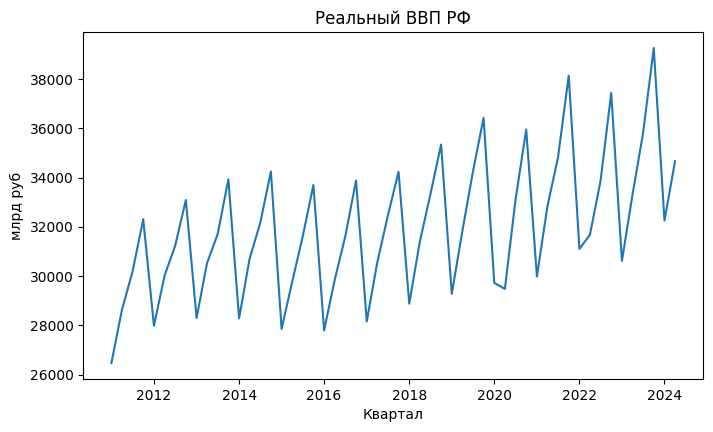

In [12]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(gdppc['RGDPRU'])
plt.xlabel('Квартал')
plt.ylabel('млрд руб')
plt.title('Реальный ВВП РФ')
plt.show()

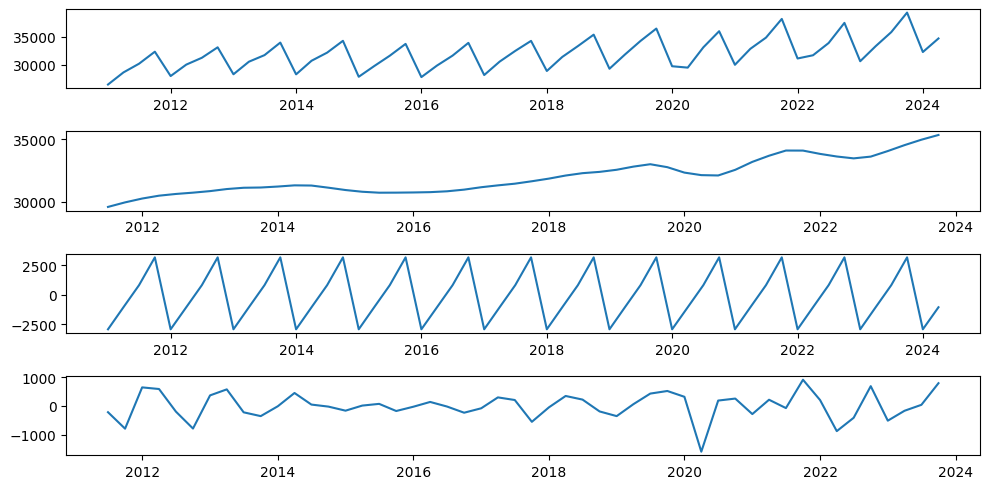

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(gdppc['RGDPRU'], model='additive', period = 4)
fig, ax = plt.subplots(4,1, figsize = (10, 5))
ax[0].plot(result_add.observed)
ax[1].plot(result_add.trend)
ax[2].plot(result_add.seasonal)
ax[3].plot(result_add.resid)
plt.tight_layout()
plt.show()